In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch.nn.functional as F
from transformers import PreTrainedModel, PretrainedConfig
from transformers import Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, f1_score

2025-05-17 13:25:35.441315: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747459535.522917  105939 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747459535.548377  105939 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747459535.791982  105939 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747459535.792007  105939 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747459535.792009  105939 computation_placer.cc:177] computation placer alr

In [2]:
data1 = pd.read_csv('train_emotions.csv')
data1.fillna(0, inplace=True)
data1

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.019531,0.029785,0.036621,0.033203,0.033691,0.033203,0.035645,0.033691,0.040039,0.037598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
1,0.025391,0.036621,0.043457,0.038086,0.036621,0.036133,0.044434,0.051270,0.066406,0.063965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
2,0.020996,0.029785,0.037598,0.035645,0.033691,0.034668,0.038086,0.038574,0.043457,0.041504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
3,0.030762,0.047363,0.059082,0.056152,0.052246,0.050293,0.062500,0.067871,0.076660,0.071777,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
4,0.045898,0.058594,0.070801,0.057129,0.044434,0.051270,0.066406,0.102539,0.122559,0.112793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73835,0.041504,0.064941,0.097168,0.102539,0.091309,0.089355,0.070312,0.072266,0.081055,0.067871,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
73836,0.040039,0.061035,0.076172,0.070801,0.064941,0.054199,0.057617,0.063965,0.067383,0.071289,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
73837,0.047852,0.068848,0.087891,0.078613,0.073730,0.068848,0.070312,0.071777,0.074219,0.075195,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
73838,0.041016,0.067871,0.087891,0.085449,0.082520,0.072754,0.083008,0.083984,0.084473,0.090332,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive


In [3]:
data2 = pd.read_csv('test_emotions.csv')
data2.fillna(0, inplace=True)
data2

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.025391,0.031738,0.038574,0.026855,0.026855,0.034668,0.045410,0.054199,0.059082,0.057617,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,negative
1,0.150391,0.162598,0.180176,0.073730,0.064941,0.065430,0.068848,0.070801,0.080078,0.097656,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,positive
2,0.019043,0.024414,0.032715,0.034668,0.035156,0.037109,0.035645,0.035156,0.030273,0.038086,...,-11.658588,-0.967232,-9.198069,-2.373846,-9.807080,10.628701,-1.992553,0.143462,2.126044,neutral
3,0.018066,0.030762,0.062012,0.082031,0.104004,0.129883,0.125000,0.112305,0.090820,0.068848,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,positive
4,0.019043,0.028809,0.041016,0.042480,0.041992,0.042480,0.040527,0.040527,0.041992,0.042969,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4611,0.018066,0.026367,0.037598,0.037598,0.040039,0.040527,0.041992,0.043457,0.043457,0.042969,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,positive
4612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.395961,-3.695465,-3.683924,-3.430692,-3.029513,-2.550655,-2.041340,-1.551488,-1.130006,neutral
4613,0.040527,0.057617,0.067383,0.055664,0.067383,0.079590,0.096680,0.104004,0.083496,0.063965,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,positive
4614,0.015137,0.025391,0.034668,0.034668,0.040527,0.039551,0.038086,0.037598,0.032715,0.031250,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral


In [4]:
x_train = data1.iloc[: ,:-1].values
y_train = data1['Emotions'].values

In [5]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)

In [6]:
x_test = data2.iloc[: ,:-1].values
y_test = data2['Emotions'].values

In [25]:
import joblib

joblib.dump(encoder, 'dabloat-cnn-encoder-aug.pkl')

['dabloat-cnn-encoder-aug.pkl']

In [7]:
y_test = encoder.fit_transform(y_test)

In [24]:
y_test

array([0, 2, 1, ..., 2, 1, 2], shape=(4616,))

In [8]:
class CNNConfig(PretrainedConfig):
    model_type = "cnn"

    def __init__(self, input_length=512, num_labels=3, **kwargs):
        super().__init__(**kwargs)
        self.input_length = input_length
        self.num_labels = num_labels

class CNNForSequenceClassification(PreTrainedModel):
    config_class = CNNConfig

    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels

        self.conv1 = nn.Conv1d(1, 512, kernel_size=5, stride=1, padding=2)
        self.bn1 = nn.BatchNorm1d(512)
        self.pool1 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)

        self.conv2 = nn.Conv1d(512, 512, kernel_size=5, stride=1, padding=2)
        self.bn2 = nn.BatchNorm1d(512)
        self.pool2 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)
        self.drop2 = nn.Dropout(0.2)

        self.conv3 = nn.Conv1d(512, 256, kernel_size=5, stride=1, padding=2)
        self.bn3 = nn.BatchNorm1d(256)
        self.pool3 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)

        self.conv4 = nn.Conv1d(256, 256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm1d(256)
        self.pool4 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)
        self.drop4 = nn.Dropout(0.2)

        self.conv5 = nn.Conv1d(256, 128, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm1d(128)
        self.pool5 = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)
        self.drop5 = nn.Dropout(0.2)

        # Compute flattened output size dynamically
        with torch.no_grad():
            dummy = torch.zeros(1, 1, config.input_length, device=self.conv1.weight.device)
            x = self._forward_features(dummy)
            self.flattened_size = x.view(1, -1).size(1)

        self.fc1 = nn.Linear(self.flattened_size, 512)
        self.bn_fc1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, config.num_labels)

        self.post_init()

    def _forward_features(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.drop2(x)
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))
        x = self.pool4(F.relu(self.bn4(self.conv4(x))))
        x = self.drop4(x)
        x = self.pool5(F.relu(self.bn5(self.conv5(x))))
        x = self.drop5(x)
        return x

    def forward(self, input_values=None, labels=None):
        x = input_values.unsqueeze(1)  # (B, 1, T)
        x = self._forward_features(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.bn_fc1(self.fc1(x)))
        logits = self.fc2(x)

        loss = None
        if labels is not None:
            loss = nn.CrossEntropyLoss()(logits, labels)

        return {"loss": loss, "logits": logits} if loss is not None else {"logits": logits}


In [9]:
class EmotionDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return {"input_values": self.X[idx], "labels": self.y[idx]}

In [10]:
train_dataset = EmotionDataset(x_train, y_train)
val_dataset = EmotionDataset(x_test, y_test)

In [11]:
config = CNNConfig(input_length=2376, num_labels=3)
model = CNNForSequenceClassification(config)
model.to("cuda" if torch.cuda.is_available() else "cpu")

CNNForSequenceClassification(
  (conv1): Conv1d(1, 512, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool1d(kernel_size=5, stride=2, padding=2, dilation=1, ceil_mode=False)
  (conv2): Conv1d(512, 512, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool1d(kernel_size=5, stride=2, padding=2, dilation=1, ceil_mode=False)
  (drop2): Dropout(p=0.2, inplace=False)
  (conv3): Conv1d(512, 256, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool1d(kernel_size=5, stride=2, padding=2, dilation=1, ceil_mode=False)
  (conv4): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool4): MaxPool1d(

In [12]:
training_args = TrainingArguments(
    output_dir="./cnn_emotion_output",
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    num_train_epochs=25,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    learning_rate=5e-4,
    load_best_model_at_end=True,
    fp16=True,
    metric_for_best_model="accuracy",
)

In [13]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average="weighted")
    return {"accuracy": acc, "f1": f1}


In [14]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

In [15]:
trainer.train()

Could not estimate the number of tokens of the input, floating-point operations will not be computed


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.735700,0.646814,0.715988,0.708375
2,0.527900,0.475204,0.802860,0.801299
3,0.350900,0.332866,0.872834,0.871503
4,0.215500,0.217813,0.925477,0.924872
5,0.129600,0.199351,0.939775,0.939279
6,0.084100,0.187548,0.947140,0.946774
7,0.055300,0.177459,0.954506,0.954097
8,0.040200,0.205531,0.947140,0.946508
9,0.032800,0.178843,0.954939,0.954584
10,0.024000,0.175548,0.956023,0.955682


TrainOutput(global_step=28850, training_loss=0.09196728616694644, metrics={'train_runtime': 4114.8479, 'train_samples_per_second': 448.619, 'train_steps_per_second': 7.011, 'total_flos': 0.0, 'train_loss': 0.09196728616694644, 'epoch': 25.0})

In [16]:
trainer.evaluate()

{'eval_loss': 0.1856139898300171,
 'eval_accuracy': 0.962738301559792,
 'eval_f1': 0.9625337420255953,
 'eval_runtime': 3.0141,
 'eval_samples_per_second': 1531.493,
 'eval_steps_per_second': 24.22,
 'epoch': 25.0}

In [17]:
pred = trainer.predict(val_dataset)
preds = pred.predictions
labels = pred.label_ids
pred_ids = np.argmax(preds, axis=1)
class_names = ["neutral", "positive", "negative"]

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns

# Classification Report
print("Classification Report:\n")
print(classification_report(labels, pred_ids, target_names=class_names))

Classification Report:

              precision    recall  f1-score   support

     neutral       0.97      0.93      0.95      1538
    positive       0.96      0.99      0.98      1539
    negative       0.96      0.97      0.97      1539

    accuracy                           0.96      4616
   macro avg       0.96      0.96      0.96      4616
weighted avg       0.96      0.96      0.96      4616



In [19]:
print(cohen_kappa_score(labels, pred_ids))

0.9441071939587066


<Axes: >

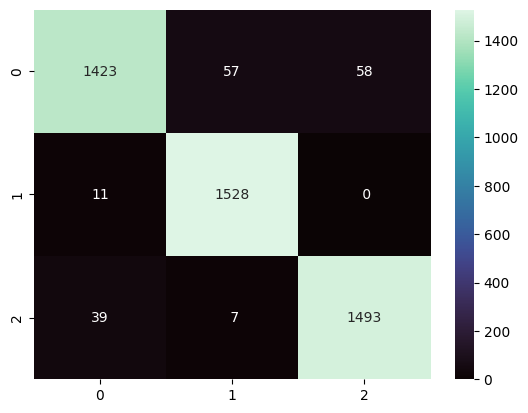

In [20]:
conf_m = confusion_matrix(labels, pred_ids)
sns.heatmap(conf_m, annot=True, cmap='mako', fmt='2d')

In [21]:
model.save_pretrained('./dabloat-cnn-emotion-aug')

In [28]:
trainer.save_model('./dabloat-cnn-emotion-aug')

In [29]:
torch.save(model.state_dict(), './dabloat-cnn-emotion-aug.pth')

In [101]:
import librosa
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)

def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)

def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y=data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=16000,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def process_test(path):
    data, sr = librosa.load(path, duration=2.5, offset=0.6)
    feat = extract_features(data)
    return feat

In [102]:
test = pd.read_csv('datasets/tess.csv')
test

,file_path,sentiment
0,TESS/YAF_neutral/YAF_shirt_neutral.wav,neutral
1,TESS/OAF_neutral/OAF_hit_neutral.wav,neutral
2,TESS/OAF_neutral/OAF_dead_neutral.wav,neutral
3,TESS/YAF_neutral/YAF_limb_neutral.wav,neutral
4,TESS/YAF_neutral/YAF_neat_neutral.wav,neutral
...,...,...
4795,TESS/OAF_Fear/OAF_south_fear.wav,negative
4796,TESS/YAF_angry/YAF_yearn_angry.wav,negative
4797,TESS/OAF_disgust/OAF_read_disgust.wav,negative
4798,TESS/YAF_sad/YAF_chair_sad.wav,negative


In [103]:
test[test['sentiment'] == 'positive'].head()

,file_path,sentiment
1600,TESS/OAF_happy/OAF_voice_happy.wav,positive
1601,TESS/YAF_pleasant_surprised/YAF_yes_ps.wav,positive
1602,TESS/YAF_happy/YAF_hole_happy.wav,positive
1603,TESS/OAF_happy/OAF_get_happy.wav,positive
1604,TESS/OAF_happy/OAF_lean_happy.wav,positive


In [104]:
test.iloc[1600]['sentiment']

'positive'

In [ ]:
path, emo = process_test(test.iloc[1600]['file_path'], test.iloc[1600]['sentiment'])

In [91]:
path = np.pad(path, (0, 2376 - path.shape[0]), 'constant')

In [92]:
datatest = EmotionDataset([path], LabelEncoder().fit_transform([emo]))

In [93]:
np.argmax(trainer.predict(datatest).predictions)

np.int64(2)

In [94]:
test.iloc[4795]['sentiment']

'negative'

In [95]:
path, emo = process_test(test.iloc[4795]['file_path'], test.iloc[4795]['sentiment'])
path = np.pad(path, (0, 2376 - path.shape[0]), 'constant')
datatest = EmotionDataset([path], LabelEncoder().fit_transform([emo]))
np.argmax(trainer.predict(datatest).predictions)


np.int64(0)

In [96]:
test.iloc[0]['sentiment']

'neutral'

In [97]:
path, emo = process_test(test.iloc[0]['file_path'], test.iloc[0]['sentiment'])
path = np.pad(path, (0, 2376 - path.shape[0]), 'constant')
datatest = EmotionDataset([path], LabelEncoder().fit_transform([emo]))
np.argmax(trainer.predict(datatest).predictions)

np.int64(1)

In [105]:
path = process_test('CREMA-D/1084_IWW_HAP_XX.wav')
path = np.pad(path, (0, 2376 - path.shape[0]), 'constant')

In [ ]:
# Created by DaBloat